# July 03 - AutoEncoder analysis

In [1]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

In [2]:
# Plot the charge distribution for a given batch
def plot_charge_hist(event, recon, iteration, num_bins=100):
    
    # Flatten the input numpy arrays
    event = event.reshape(-1,1)
    recon = recon.reshape(-1,1)
    
    # Initialize the plot and corresponding parameters
    fig, ax = plt.subplots(figsize=(16,9),facecolor="w")
    ax.tick_params(axis="both", labelsize=20)
    
    # Setup the bins beforehand
    bins = np.linspace(min(np.amin(event),np.amin(recon),1),
                       max(np.amax(event),np.amax(recon)),
                       num_bins)

    # Plot the histograms overlaid
    plt.hist(event, bins, density=False,
             label="actual", color="red",
             alpha=0.5, stacked=True)
    
    plt.hist(recon, bins, density=False,
             label="reconstructed", color="blue",
             alpha=0.5, stacked=True)
    
    # Setup the axes
    ax.set_xlabel("Charge, c", fontsize=20)
    ax.set_ylabel("Number of hits", fontsize=20)
                  
    plt.yscale("log")
    plt.legend(loc="upper right", prop={"size":20})
    plt.title(r"Actual vs Reconstructed charge distribution at iteration = ${0}$".format(iteration)
              ,fontsize=20)
    
    plt.show()

## Test 1 : Using autoencoder to learn the identity function

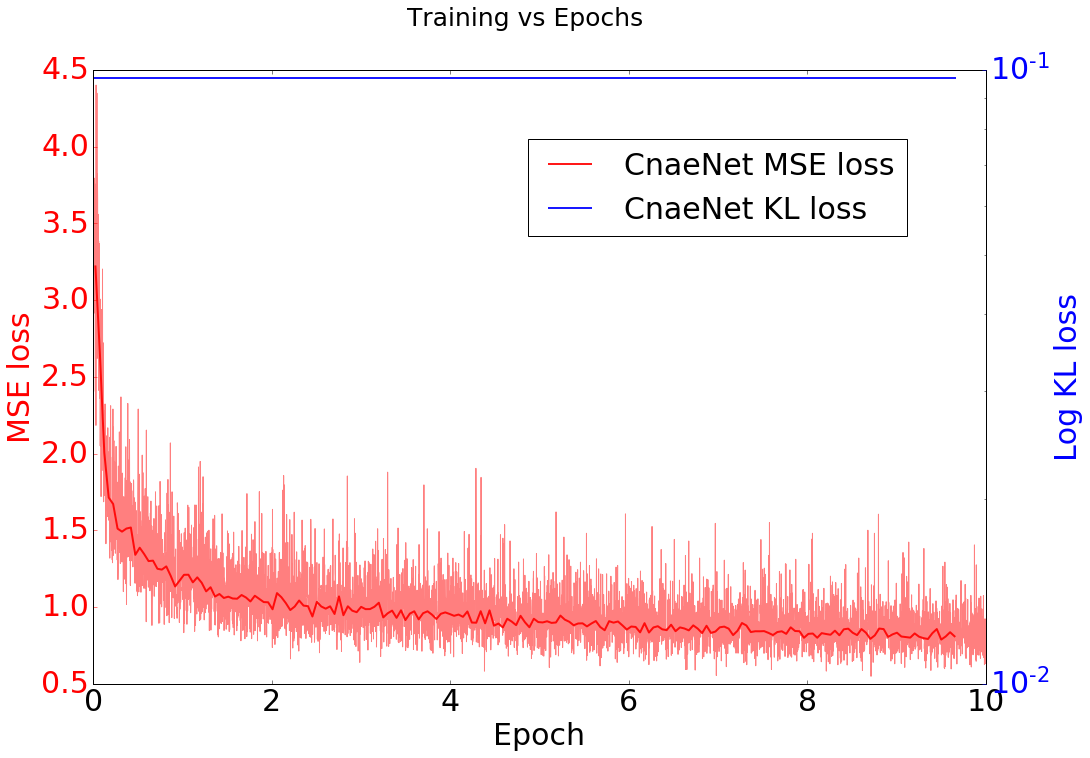

FileNotFoundError: [Errno 2] No such file or directory: '/home/akajal/WatChMaL/VAE/dumps/20190703_223630/iteration_11999.npz'

In [19]:
# Using the absolute path
run_id = "20190703_223630"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 2 : Using the same autoencoder as above but with no non-linearities

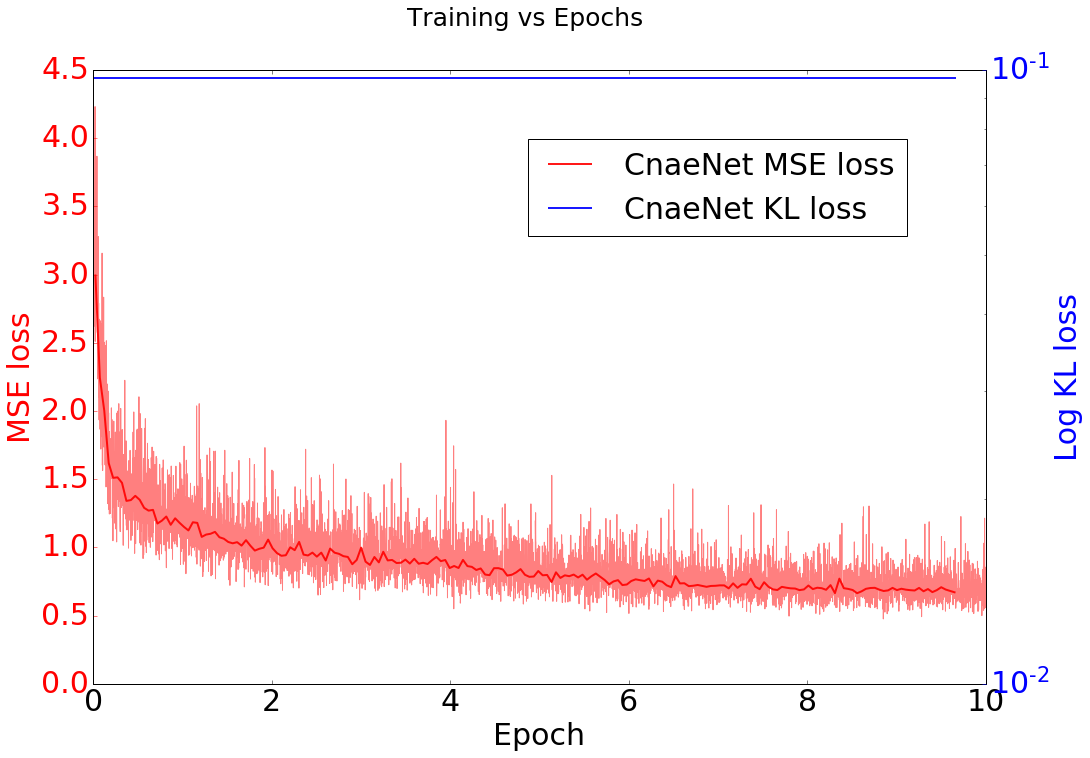

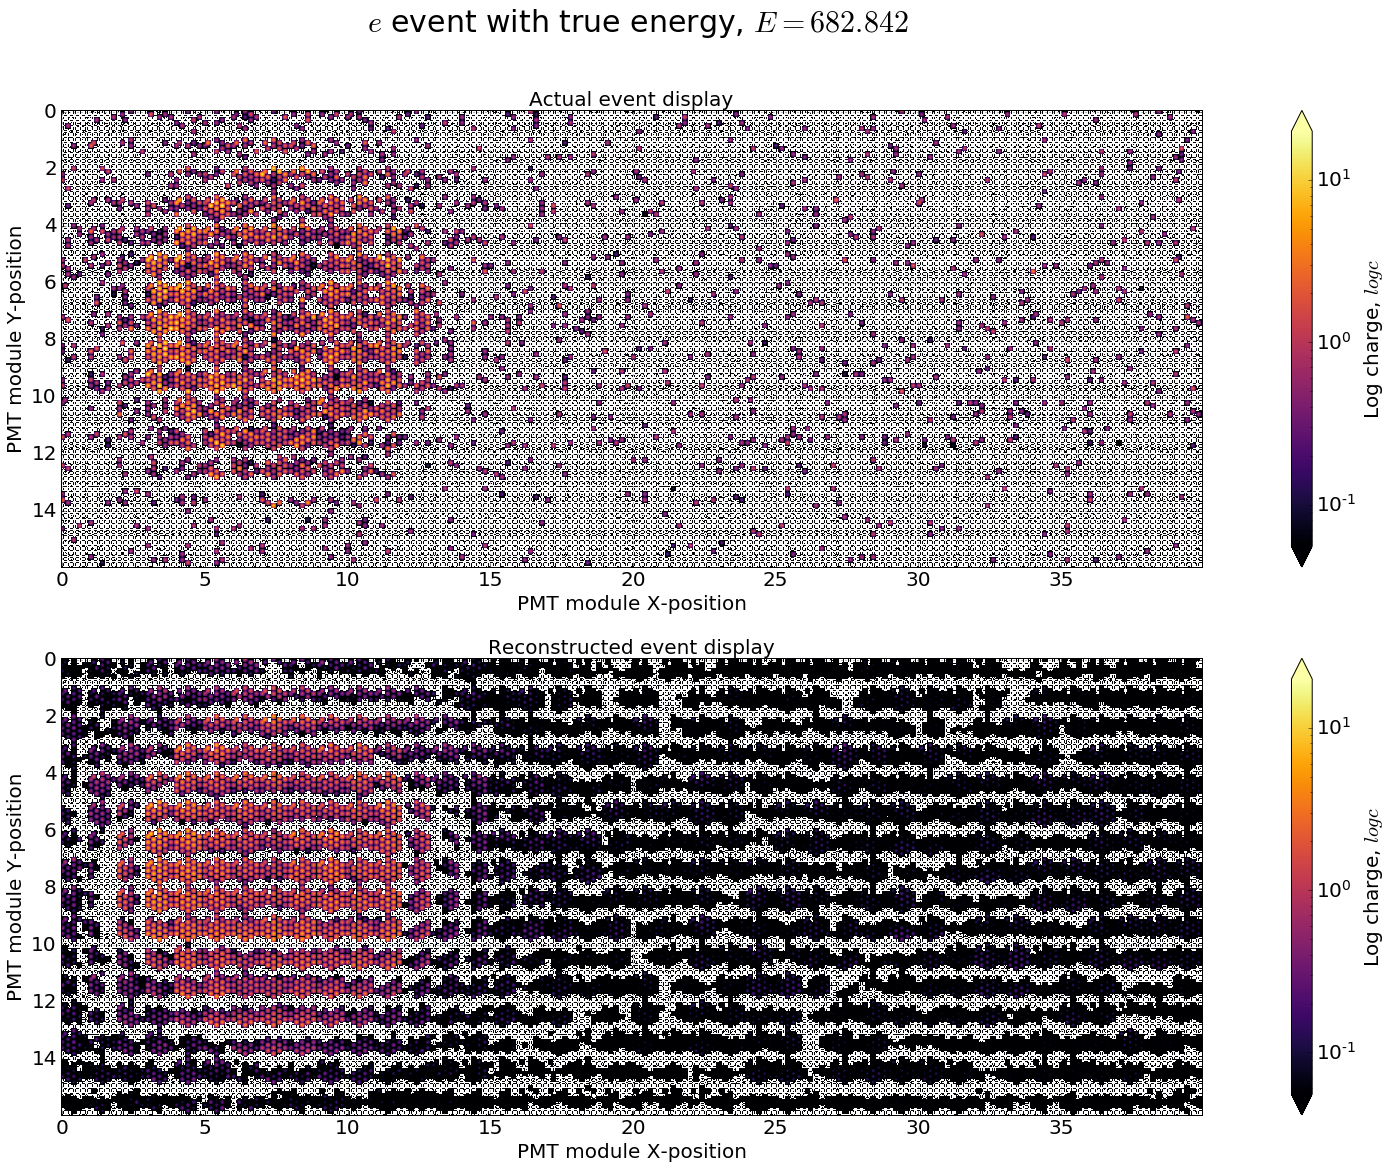

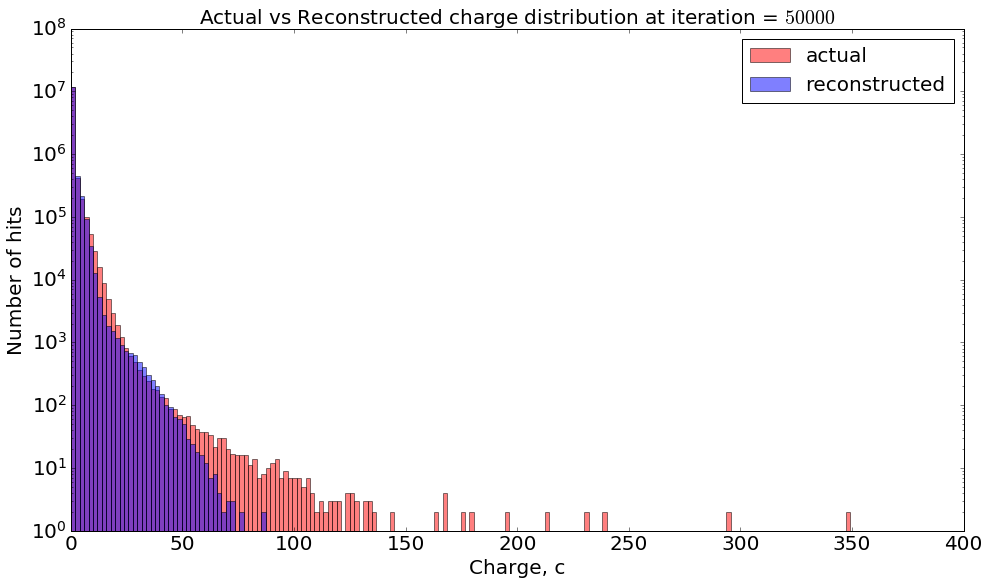

In [9]:
# Using the absolute path
run_id = "20190703_225917"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 3 : Using a bloated autoencoder with 64 channels in all hidden layers

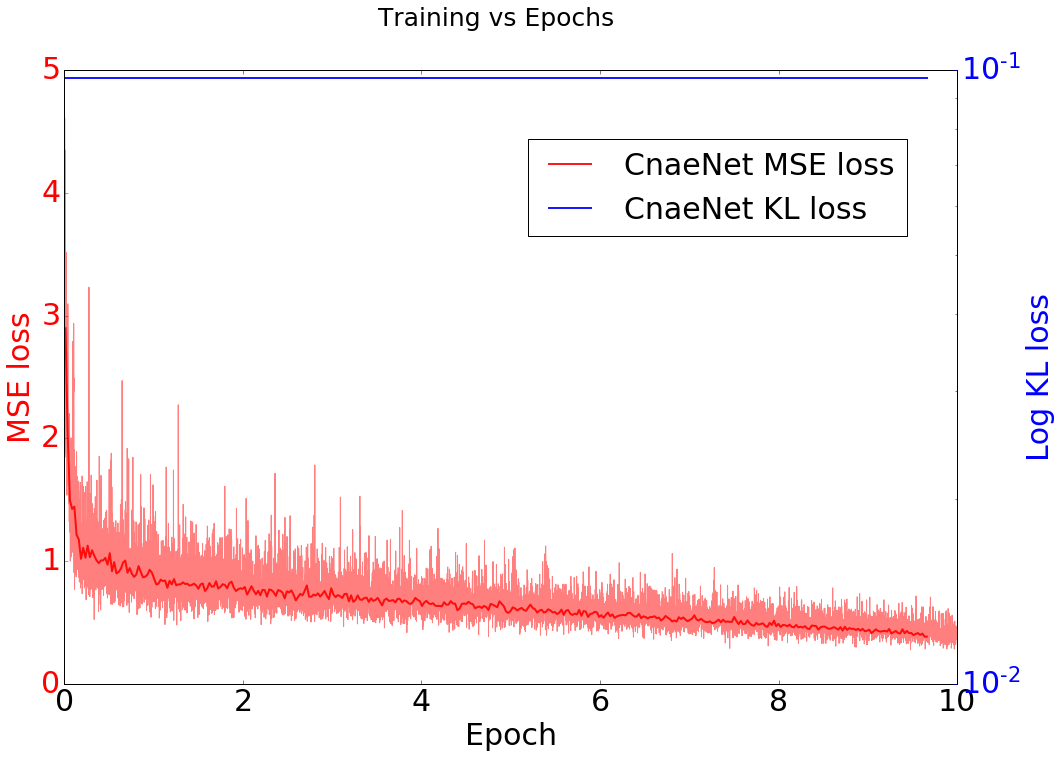

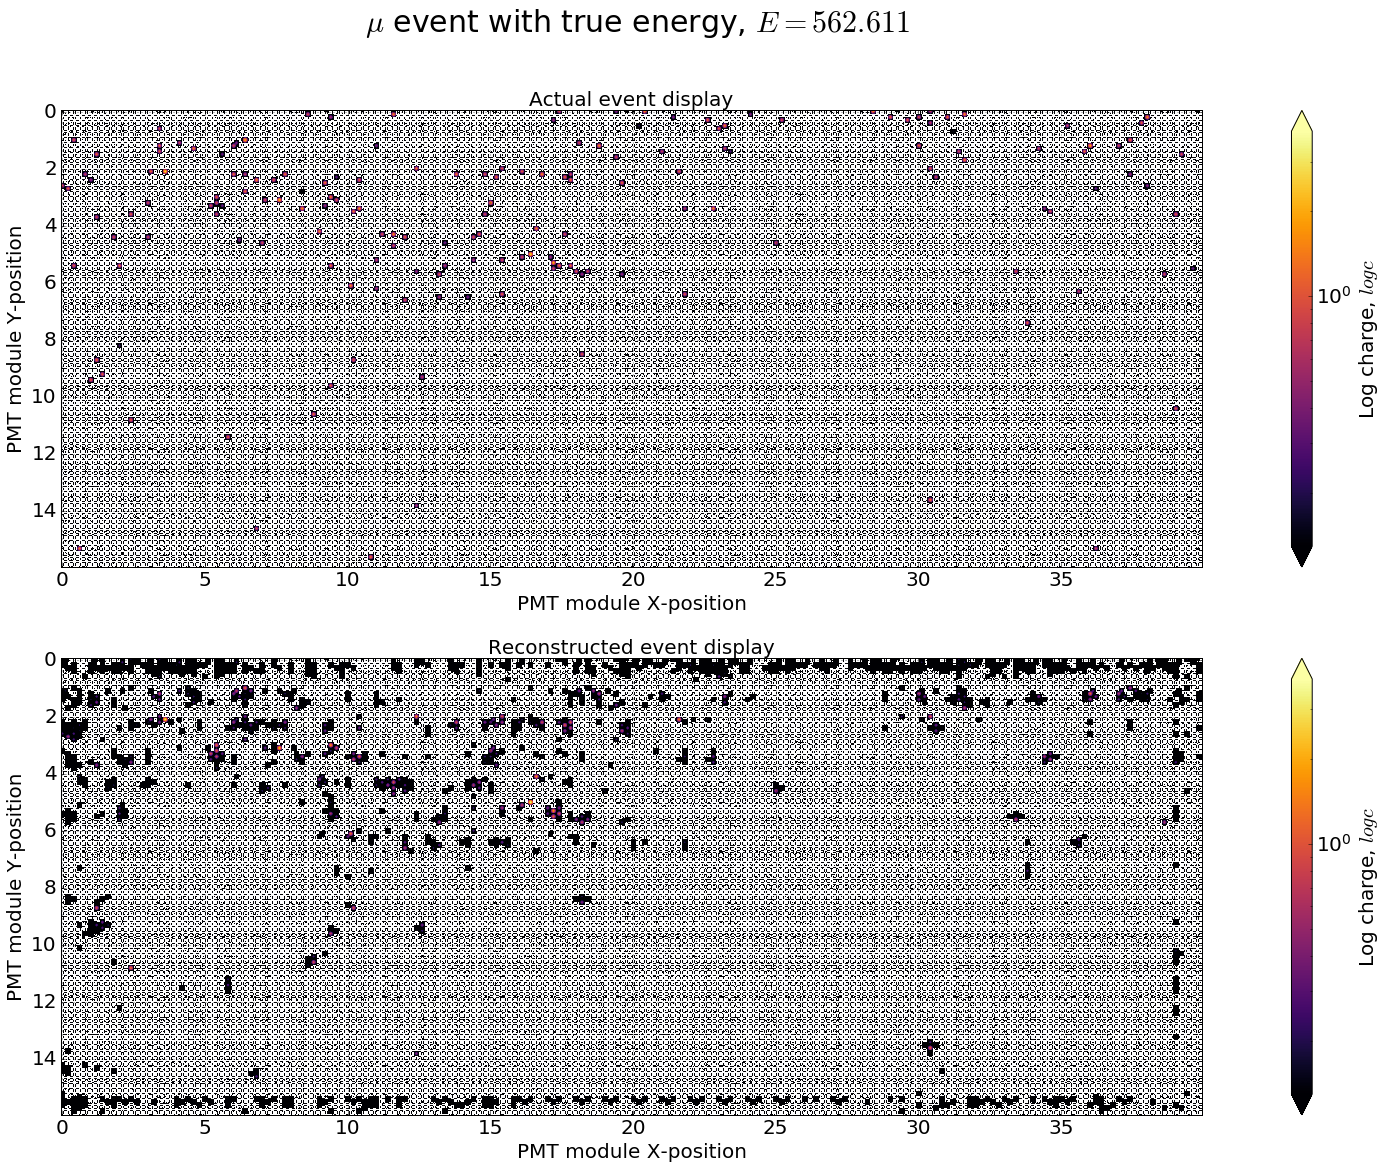

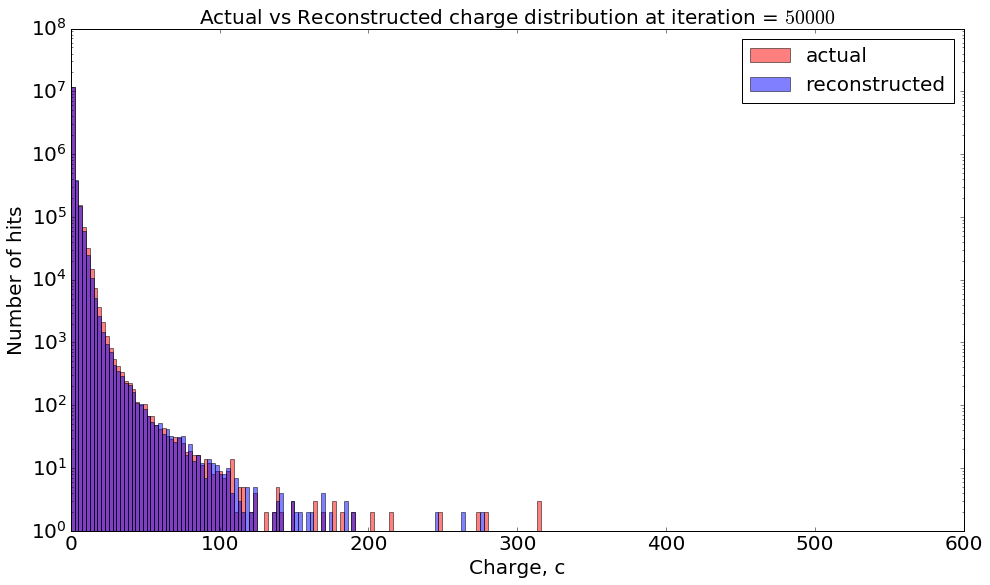

In [15]:
# Using the absolute path
run_id = "20190703_231603"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_12449.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

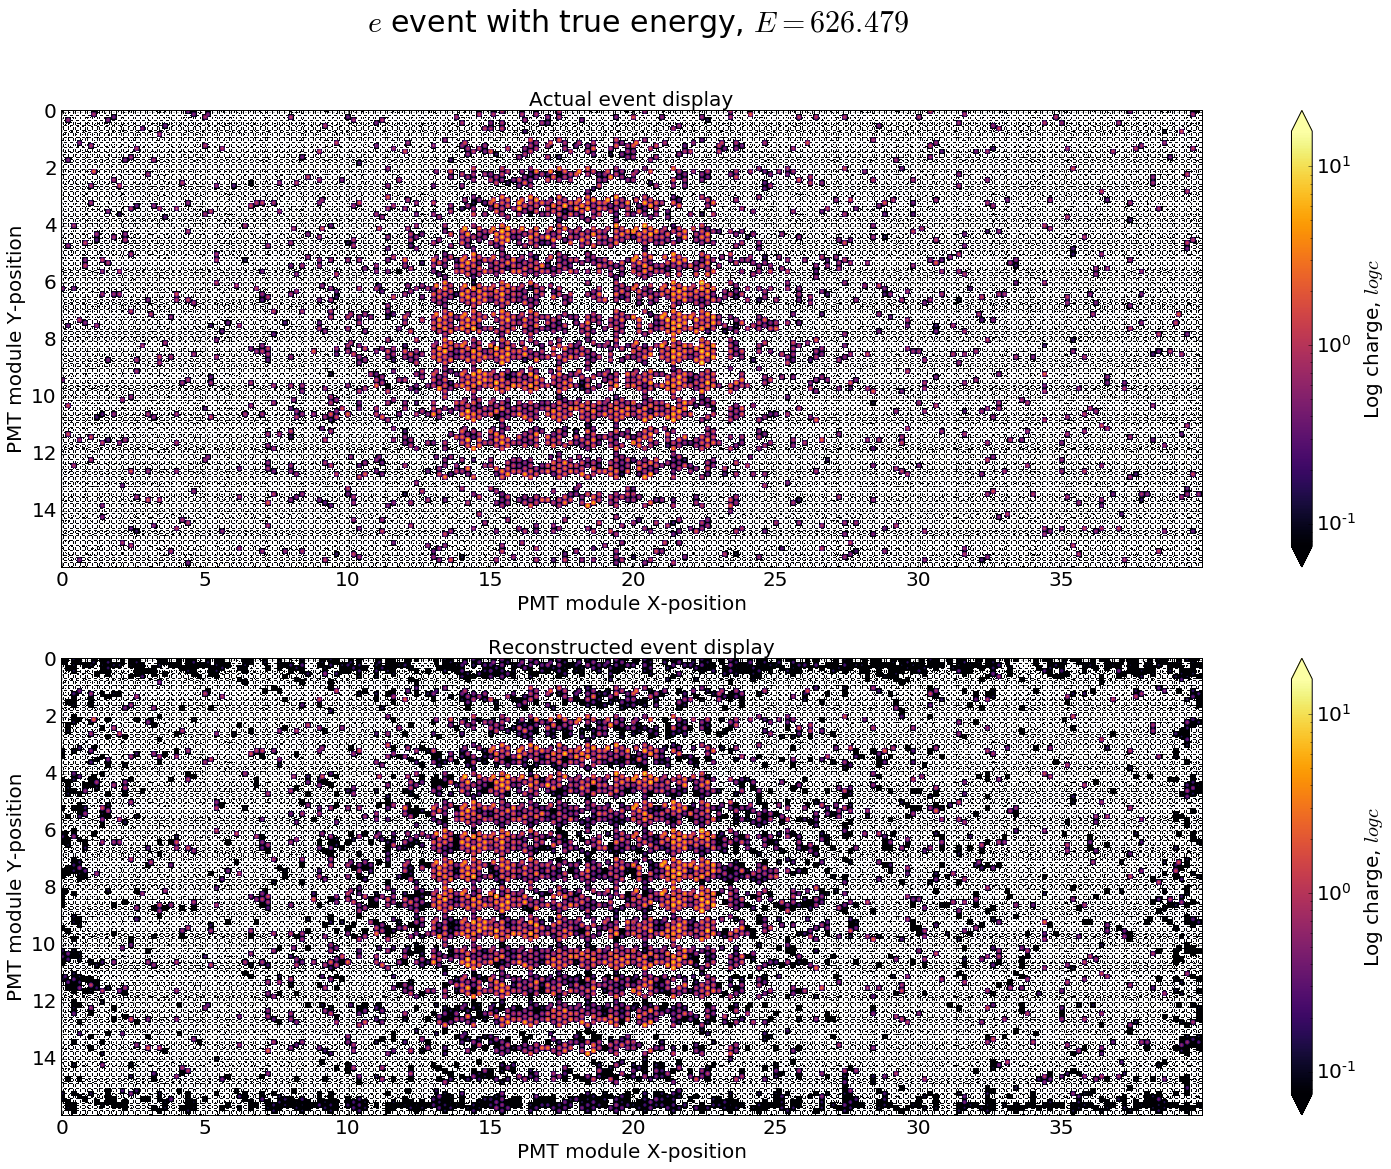

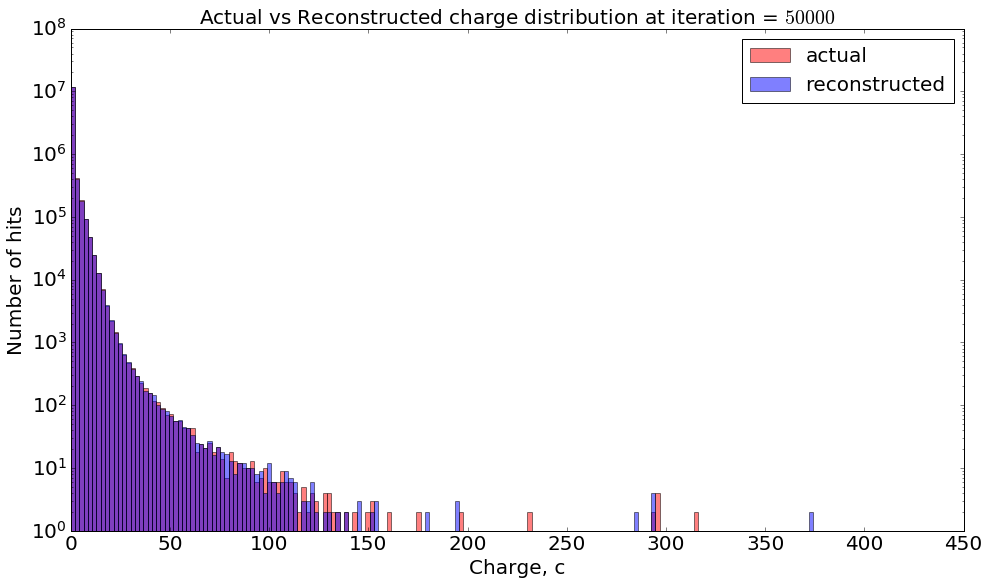

In [18]:
np_arr_path = dump_dir + "iteration_11999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 4 : Using a bloated autoencoder with 128 channels in all hidden layers

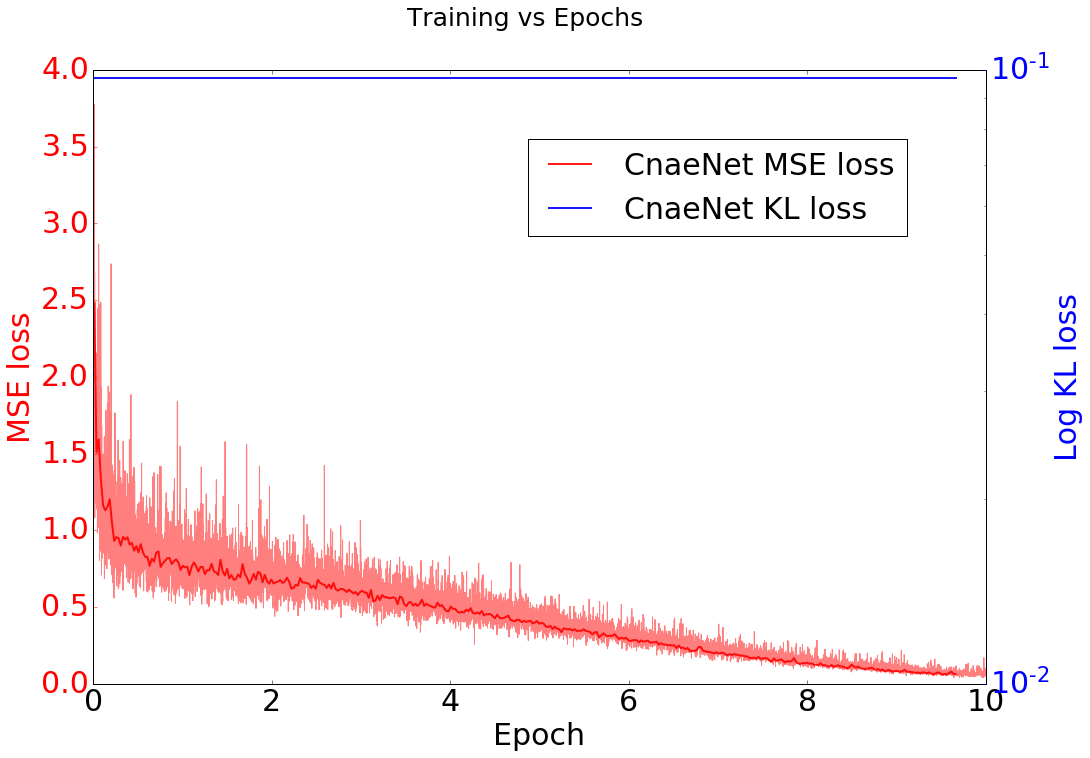

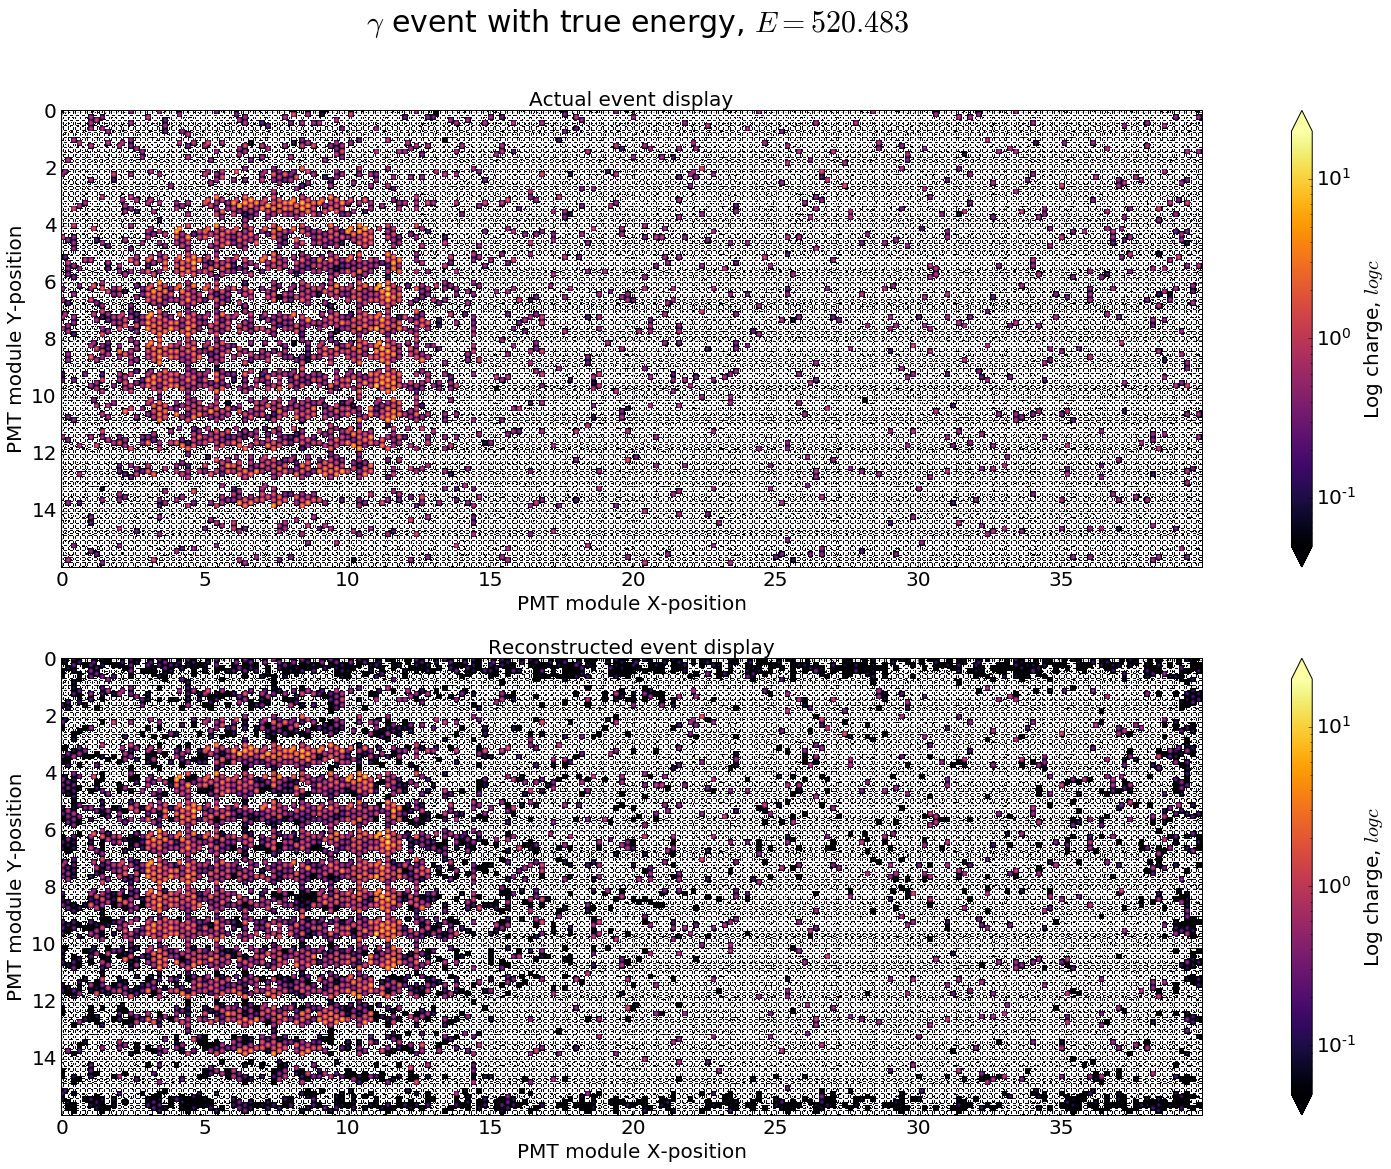

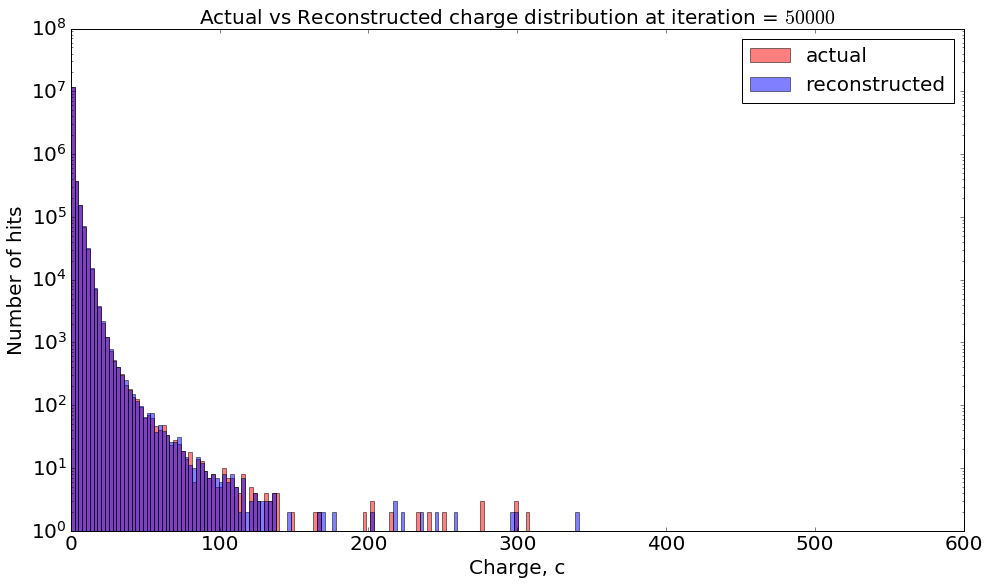

In [17]:
# Using the absolute path
run_id = "20190703_233619"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_12449.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 5 : Convolutional Downsampling in the same architecture as above

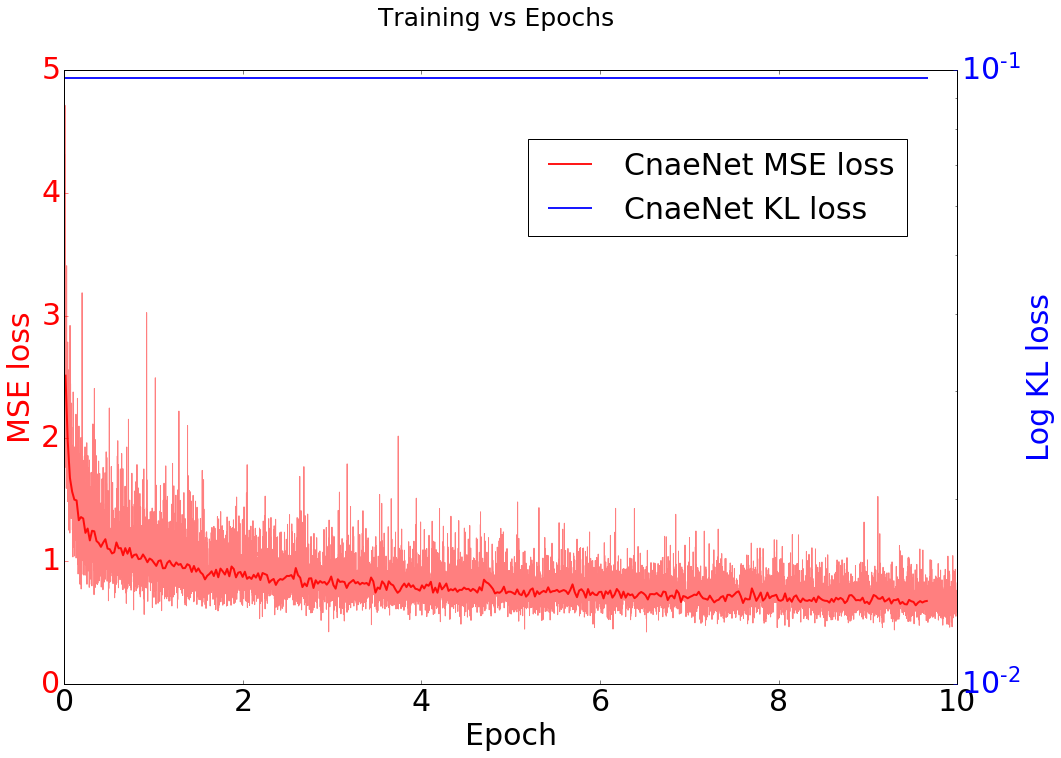

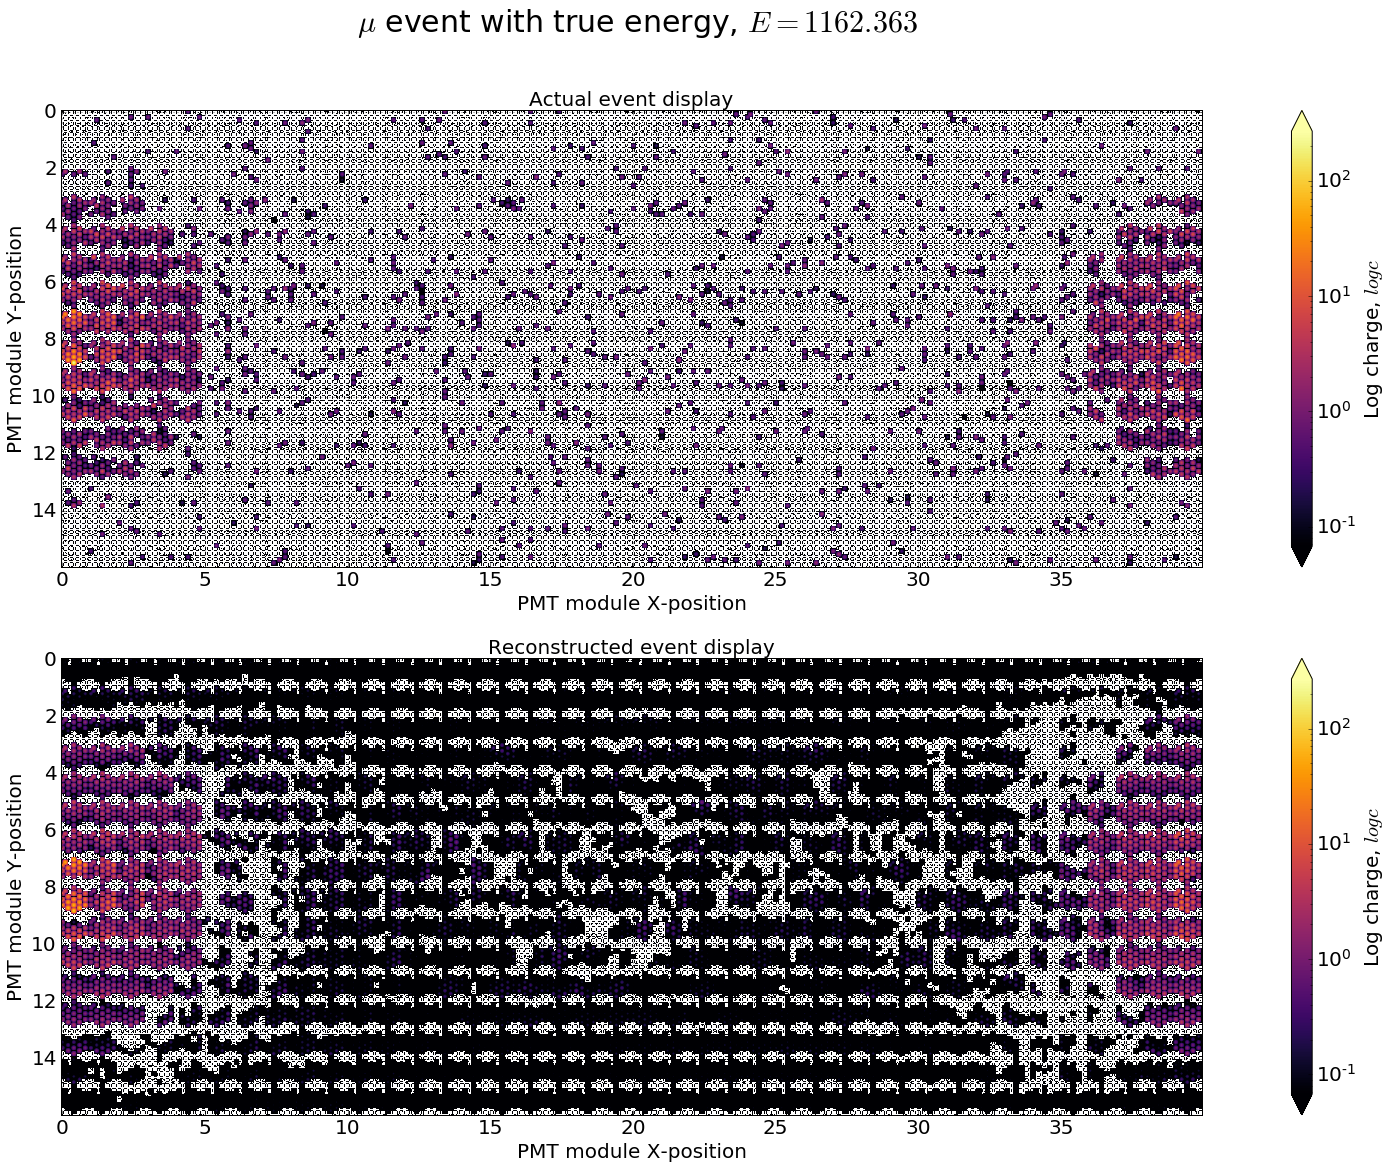

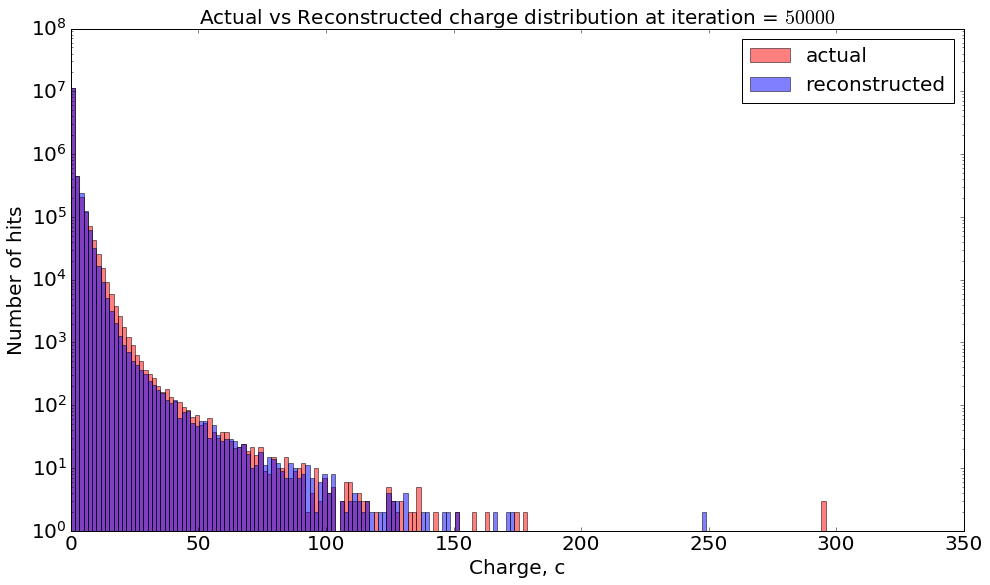

In [22]:
# Using the absolute path
run_id = "20190704_010750"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_11999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 6 : Separating Downsampling and convolutional layers

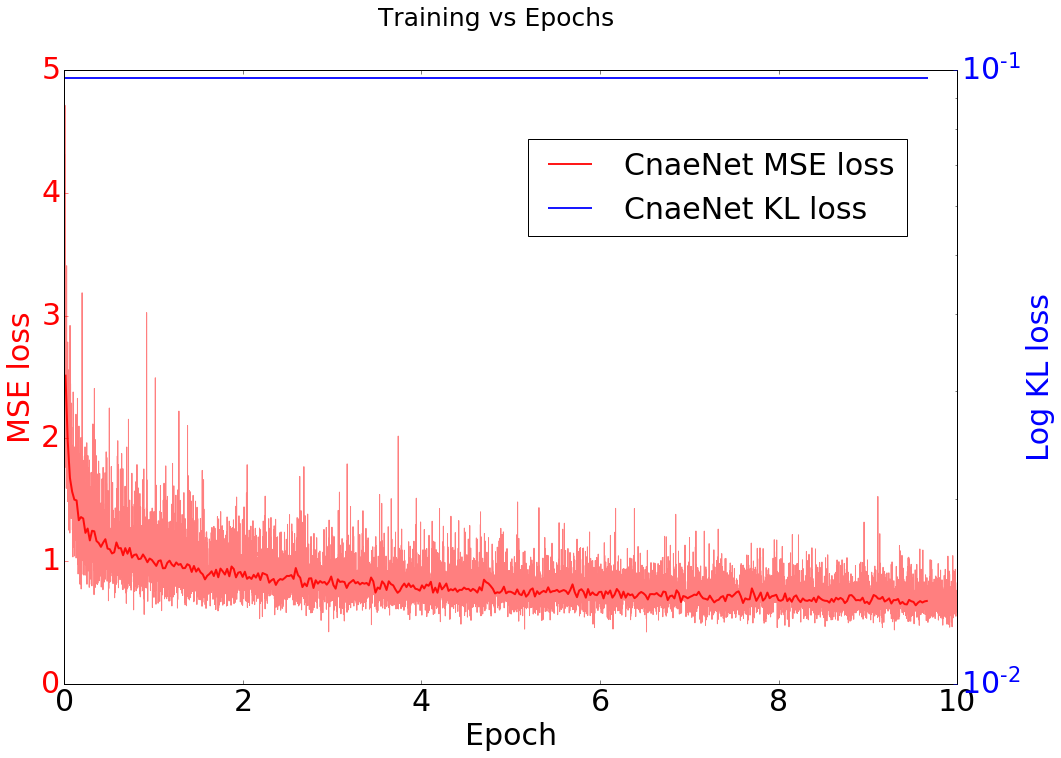

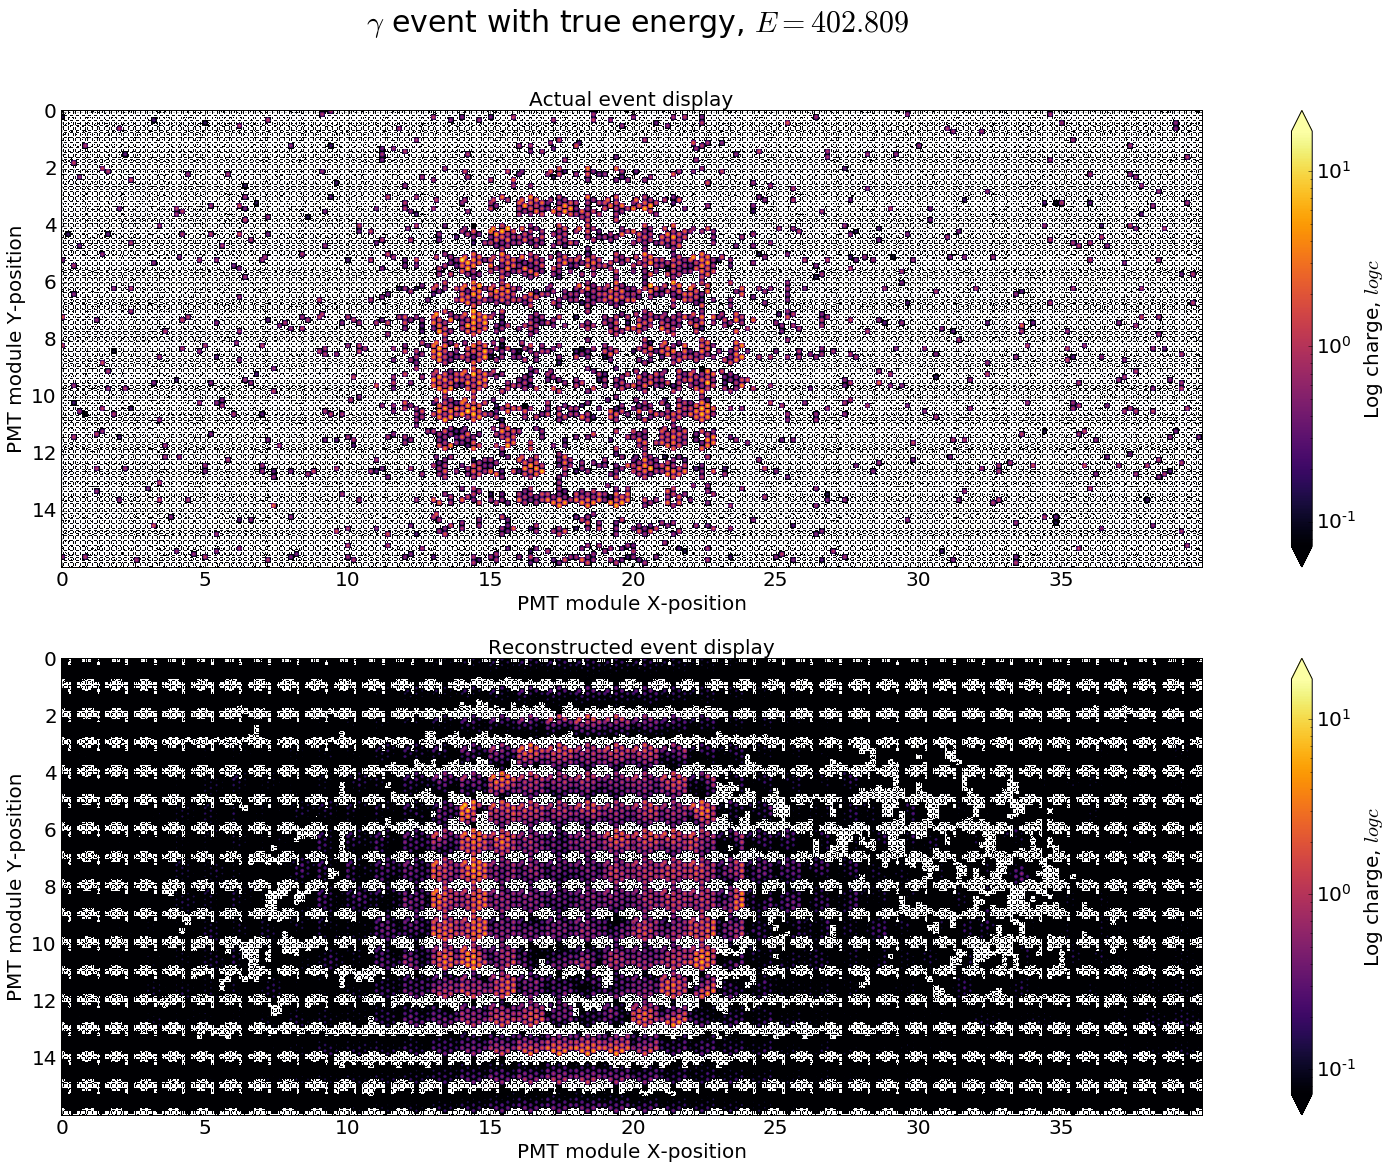

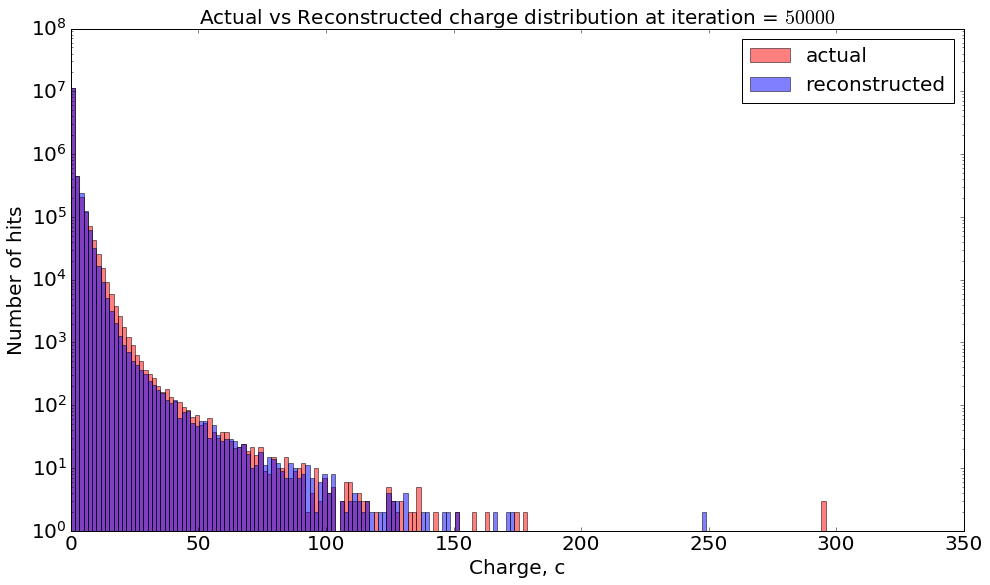

In [3]:
# Using the absolute path
run_id = "20190704_010750"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_11999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 7 : Decreasing the number of filters in the initial encoder and decoder layers

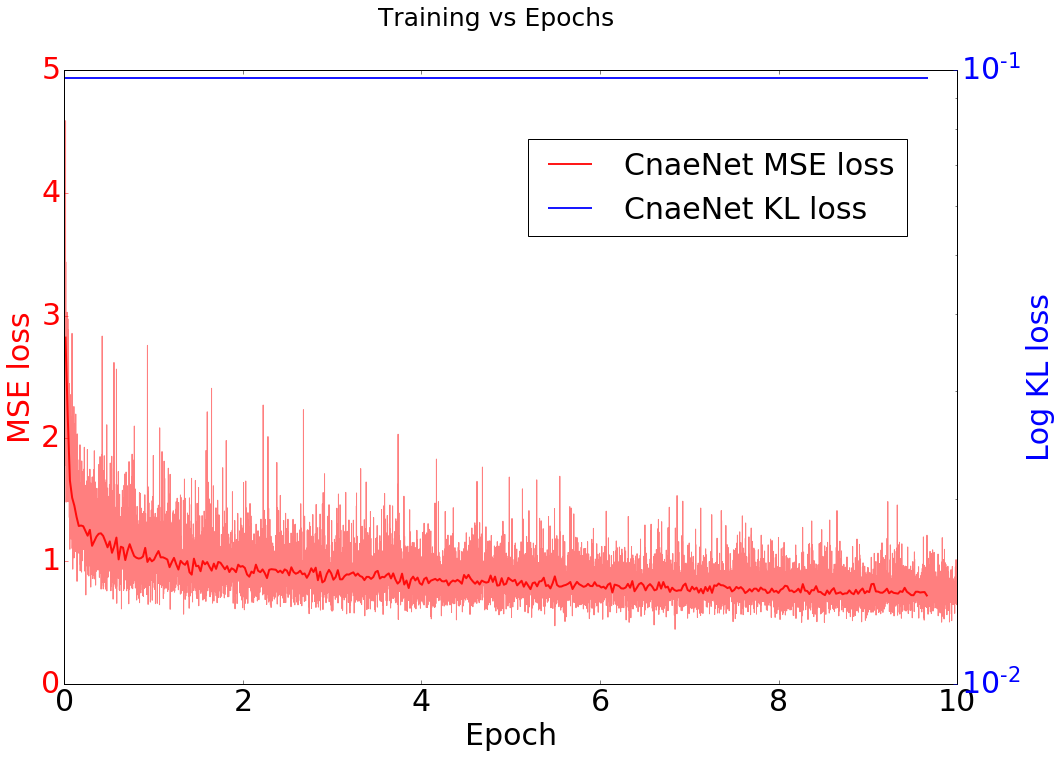

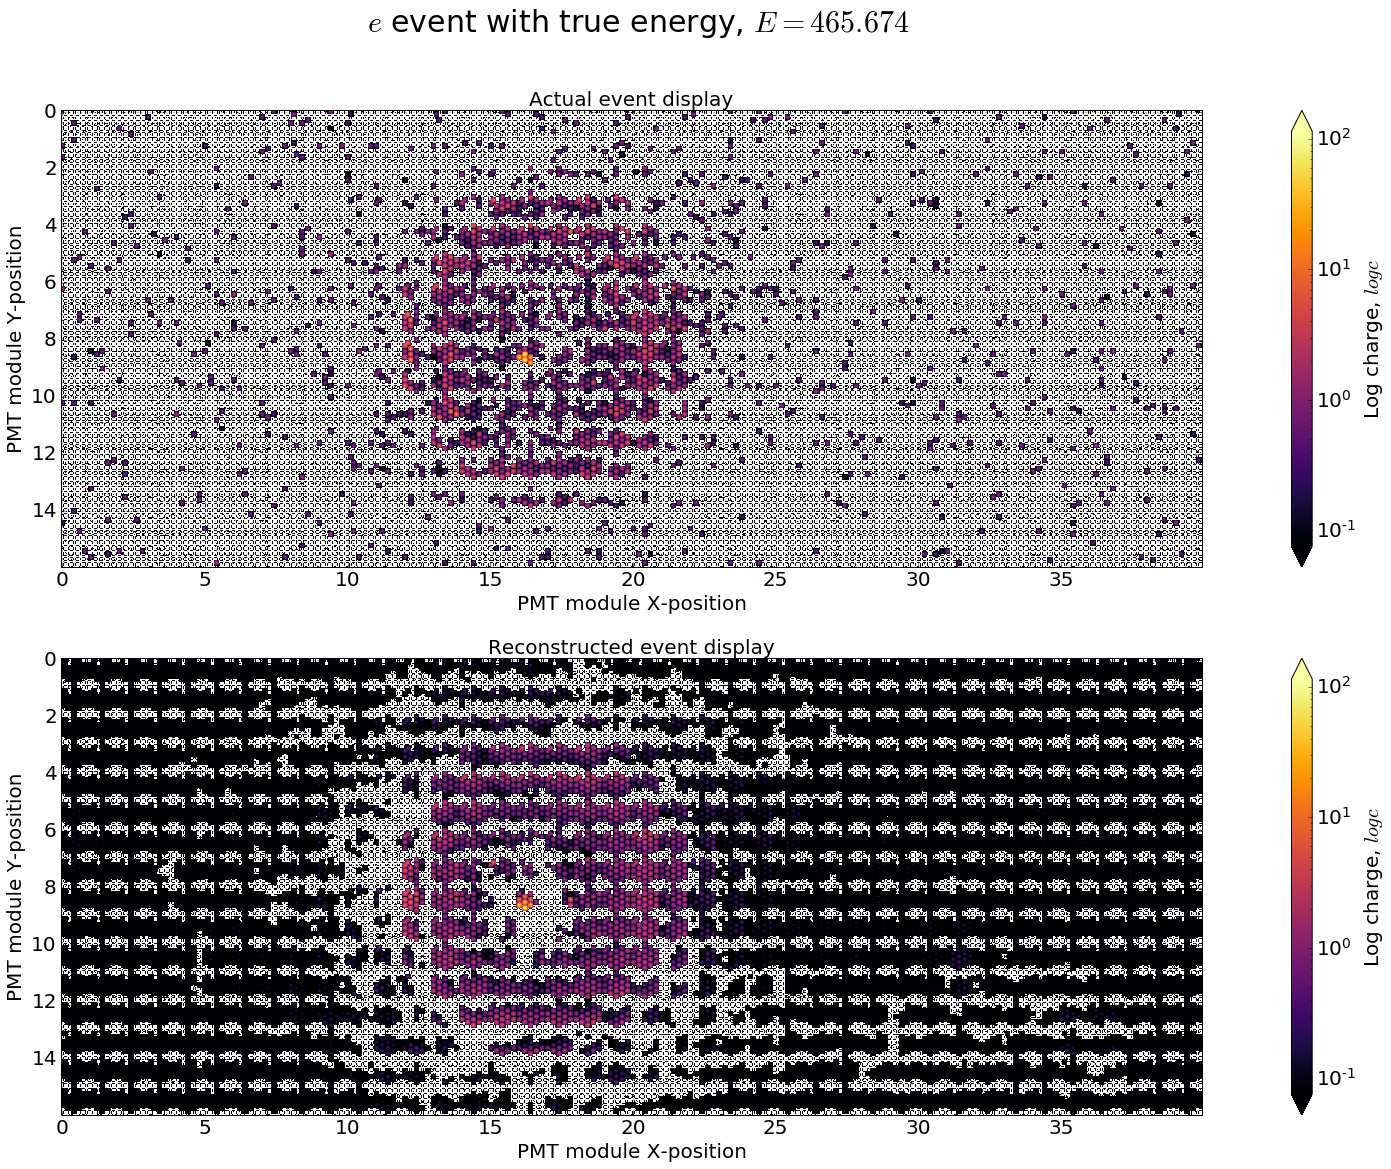

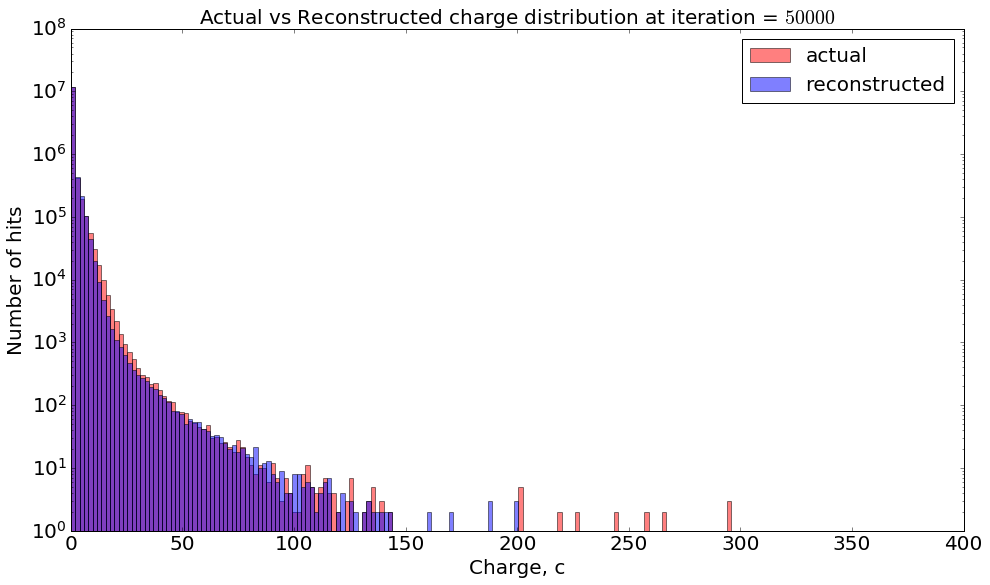

In [4]:
# Using the absolute path
run_id = "20190704_023004"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_11999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 8 : Test 7 but on the entire dataset

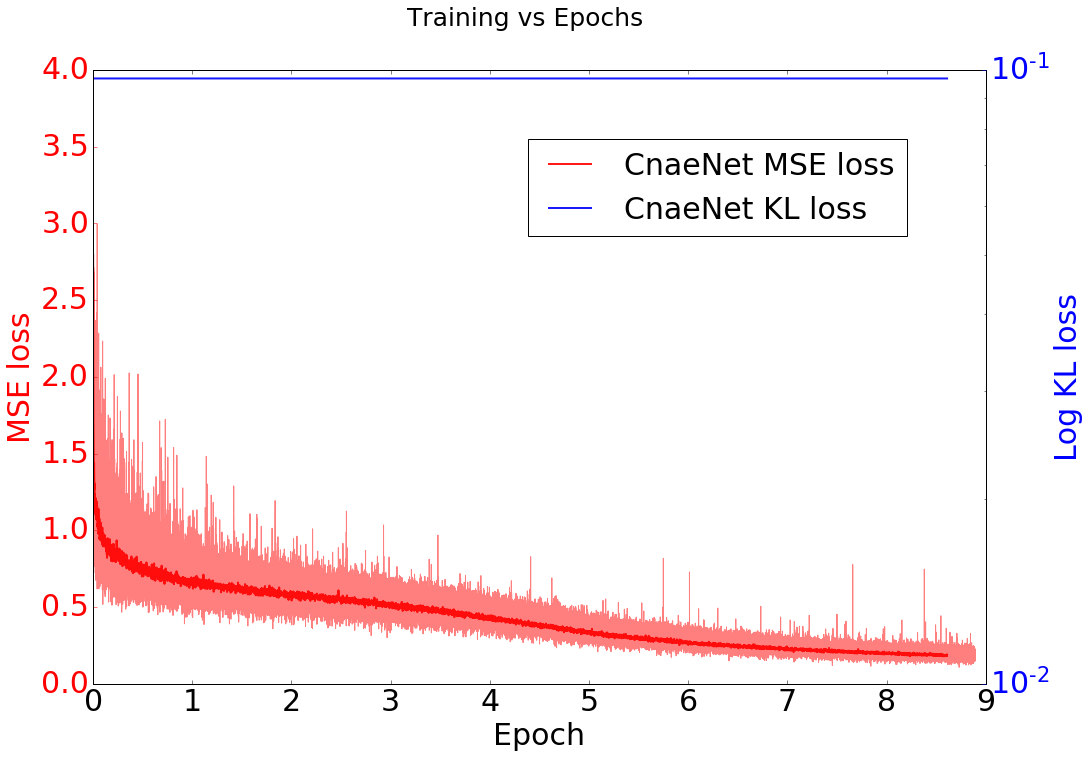

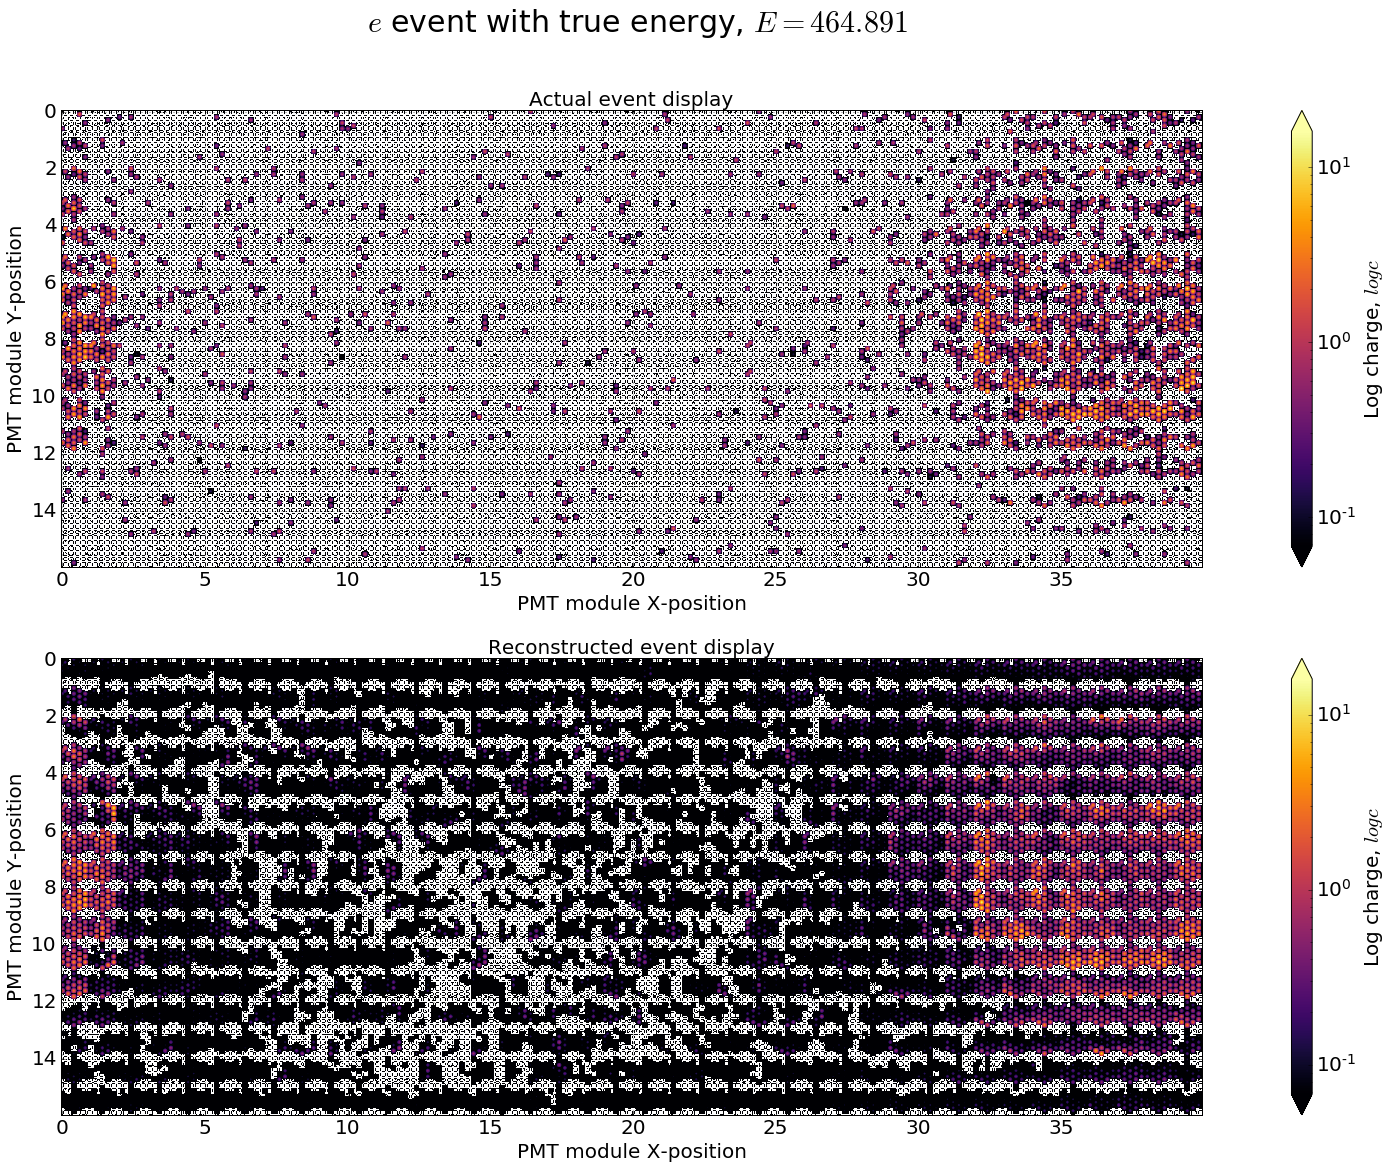

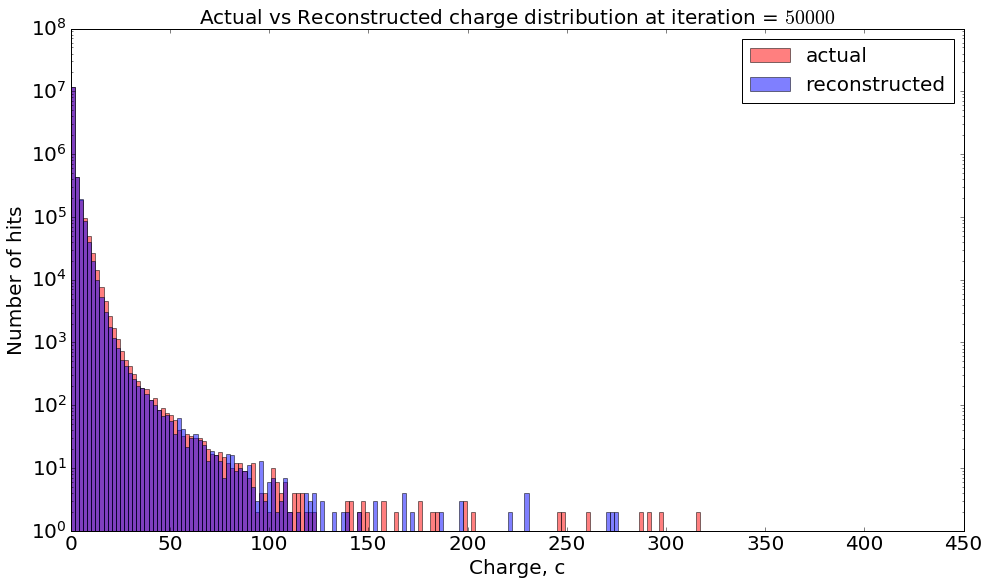

In [11]:
# Using the absolute path
run_id = "20190704_023411"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_69999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)

## Test 9 : Adding the variational part back in the autoencoder

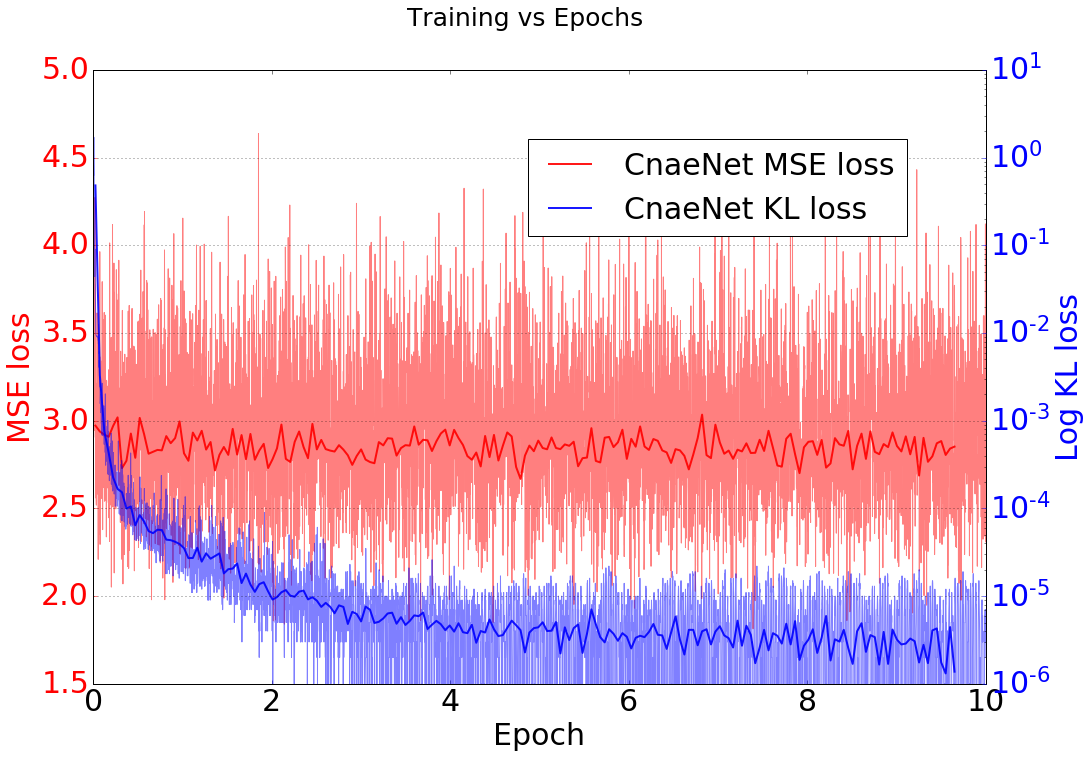

FileNotFoundError: [Errno 2] No such file or directory: '/home/akajal/WatChMaL/VAE/dumps/20190704_031009/iteration_9999.npz'

In [14]:
# Using the absolute path
run_id = "20190704_031009"
model_name = "CnaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True, legend_loc=(0.8,0.8))

np_arr_path = dump_dir + "iteration_9999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["recons"], np_arr["labels"], np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                 np_recon, 50000, num_bins=200)